In [3]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten
import numpy as np 
import matplotlib.pyplot as plt 
import random 

In [5]:
X_train = np.loadtxt(r"C:\Users\mtota\Downloads\Image Classification CNN Keras Dataset-20250228T142806Z-001\Image Classification CNN Keras Dataset\input.csv",delimiter  = ',') 
Y_train = np.loadtxt(r"C:\Users\mtota\Downloads\Image Classification CNN Keras Dataset-20250228T142806Z-001\Image Classification CNN Keras Dataset\labels.csv",delimiter  = ',') 
X_test  = np.loadtxt(r"C:\Users\mtota\Downloads\Image Classification CNN Keras Dataset-20250228T142806Z-001\Image Classification CNN Keras Dataset\input_test.csv",delimiter  = ',') 
Y_test  = np.loadtxt(r"C:\Users\mtota\Downloads\Image Classification CNN Keras Dataset-20250228T142806Z-001\Image Classification CNN Keras Dataset\labels_test.csv",delimiter  = ',') 

In [6]:
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of X_train {Y_train.shape}')
print(f'Shape of X_train {X_test.shape}')
print(f'Shape of X_train {Y_test.shape}')

Shape of X_train (2000, 30000)
Shape of X_train (2000,)
Shape of X_train (400, 30000)
Shape of X_train (400,)


In [7]:
X_train = X_train.reshape(len(X_train), 100, 100 , 3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test =  Y_test.reshape(len(Y_test),1)

In [8]:
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of X_train {Y_train.shape}')
print(f'Shape of X_train {X_test.shape}')
print(f'Shape of X_train {Y_test.shape}')

Shape of X_train (2000, 100, 100, 3)
Shape of X_train (2000, 1)
Shape of X_train (400, 100, 100, 3)
Shape of X_train (400, 1)


In [9]:
X_train[1:2]

array([[[[131., 128., 135.],
         [160., 157., 164.],
         [198., 192., 204.],
         ...,
         [250., 249., 247.],
         [255., 255., 253.],
         [250., 249., 245.]],

        [[140., 137., 144.],
         [127., 124., 131.],
         [120., 114., 124.],
         ...,
         [251., 253., 252.],
         [254., 255., 253.],
         [254., 255., 251.]],

        [[204., 202., 207.],
         [187., 185., 190.],
         [147., 142., 148.],
         ...,
         [249., 255., 255.],
         [238., 247., 242.],
         [232., 241., 236.]],

        ...,

        [[174., 182., 195.],
         [172., 180., 193.],
         [178., 186., 197.],
         ...,
         [ 87., 114.,  97.],
         [ 75.,  99.,  83.],
         [ 80., 105.,  86.]],

        [[166., 173., 189.],
         [164., 172., 185.],
         [172., 180., 193.],
         ...,
         [ 78., 106.,  84.],
         [ 72.,  97.,  76.],
         [ 77., 102.,  81.]],

        [[173., 180., 196.],
       

In [10]:
X_train = X_train / 255.0
Y_train = Y_train / 255.0
X_test = X_test / 255.0
Y_test =  Y_test /255.0

In [11]:
X_train[1:2]

array([[[[0.51372549, 0.50196078, 0.52941176],
         [0.62745098, 0.61568627, 0.64313725],
         [0.77647059, 0.75294118, 0.8       ],
         ...,
         [0.98039216, 0.97647059, 0.96862745],
         [1.        , 1.        , 0.99215686],
         [0.98039216, 0.97647059, 0.96078431]],

        [[0.54901961, 0.5372549 , 0.56470588],
         [0.49803922, 0.48627451, 0.51372549],
         [0.47058824, 0.44705882, 0.48627451],
         ...,
         [0.98431373, 0.99215686, 0.98823529],
         [0.99607843, 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98431373]],

        [[0.8       , 0.79215686, 0.81176471],
         [0.73333333, 0.7254902 , 0.74509804],
         [0.57647059, 0.55686275, 0.58039216],
         ...,
         [0.97647059, 1.        , 1.        ],
         [0.93333333, 0.96862745, 0.94901961],
         [0.90980392, 0.94509804, 0.9254902 ]],

        ...,

        [[0.68235294, 0.71372549, 0.76470588],
         [0.6745098 , 0.70588235, 0.75686275]

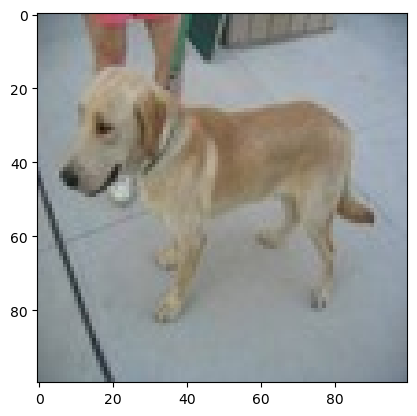

In [225]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx , :])
plt.show()

In [13]:
model = Sequential([
Conv2D(32,(3,3),activation = 'relu', input_shape = (100,100,3)),
MaxPooling2D((2,2)),
Conv2D(32,(3,3),activation = 'relu'),
Flatten(),
Dense(64, activation = 'relu'),
Dense(1,activation = 'sigmoid')
])

C:\Users\mtota\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model = Sequential() 
model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


In [15]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

In [67]:
model.fit(X_train, Y_train , epochs = 15 , batch_size = 64)

Epoch 1/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.5096 - loss: 0.0133
Epoch 2/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.4999 - loss: 0.0135
Epoch 3/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.4899 - loss: 0.0137
Epoch 4/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.4857 - loss: 0.0138
Epoch 5/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.4968 - loss: 0.0135
Epoch 6/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.4943 - loss: 0.0134
Epoch 7/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.5151 - loss: 0.0129
Epoch 8/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.5066 - loss: 0.0130
Epoch 9/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.4881 - loss: 0.0136
Epoch 10/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.5087 - loss: 0.0130
Epoch 11/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - accuracy: 0.5285 - loss: 0.0125
Epoch 12/15
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step

In [69]:
model.evaluate(X_test , Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7916 - loss: 0.0066  


[0.015048754401504993, 0.5]

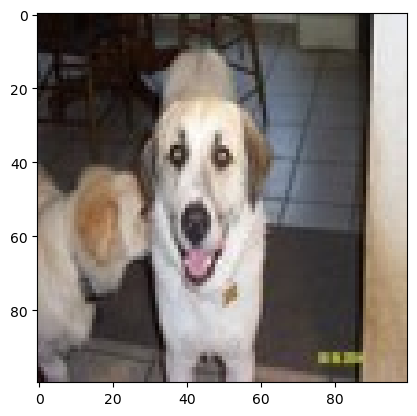

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Model Predict That is : Dog


In [319]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_train[idx2 , :])
plt.show()
y_pred = model.predict(X_test[idx2, : ].reshape(1,100,100,3))
if(y_pred > .5): 
    pred = 'Cat'
else : 
    pred = 'Dog'
print(f'Model Predict That is : {pred}')